In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("facebook-fact-check.csv")

In [4]:
df[['share_count', 'reaction_count', 'comment_count']] = df[['share_count', 'reaction_count', 'comment_count']].fillna(0)

In [6]:
df['total_engagement'] = df['share_count'] + df['reaction_count'] + df['comment_count']
print(df)

           account_id           post_id    Category               Page  \
0     184096565021911  1035057923259100  mainstream  ABC News Politics   
1     184096565021911  1035269309904628  mainstream  ABC News Politics   
2     184096565021911  1035305953234297  mainstream  ABC News Politics   
3     184096565021911  1035322636565962  mainstream  ABC News Politics   
4     184096565021911  1035352946562931  mainstream  ABC News Politics   
...               ...               ...         ...                ...   
2277  114517875225866  1472393822771591        left      The Other 98%   
2278  114517875225866  1472419749435665        left      The Other 98%   
2279  114517875225866  1472551312755842        left      The Other 98%   
2280  114517875225866  1472557792755194        left      The Other 98%   
2281  114517875225866  1472655802745393        left      The Other 98%   

                                               Post URL Date Published  \
0     https://www.facebook.com/ABCNew

In [31]:
engagement_by_type = df.groupby("post_type")["total_engagement"].mean()
print(engagement_by_type)

post_type
link     179.5
video     88.0
Name: total_engagement, dtype: float64


In [33]:
misinfo_shares = df.groupby("rating")["share_count"].mean().reset_index()
print(misinfo_shares)

               rating  share_count
0         mostly true         18.0
1  no factual content         74.5


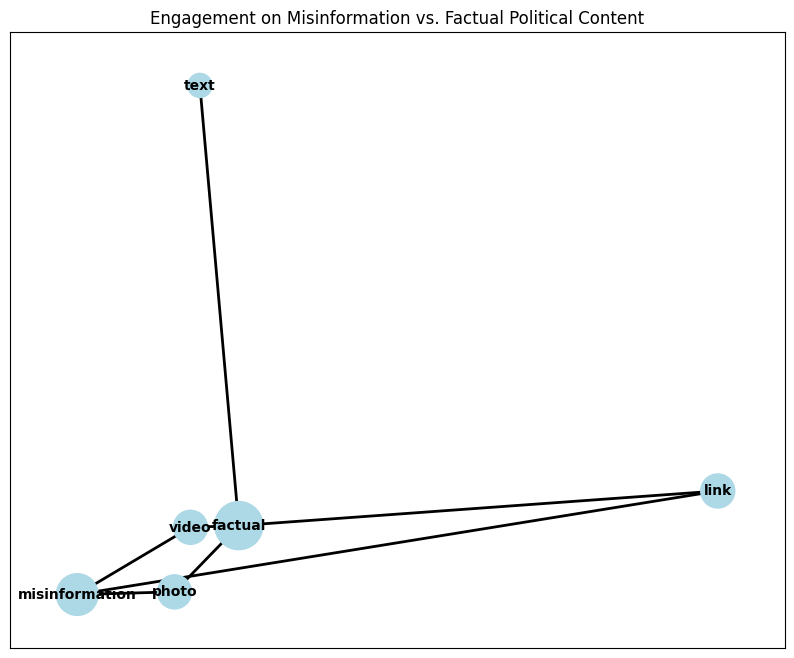

In [8]:
G = nx.Graph()

categories = ['misinformation', 'factual']
def classify_rating(rating):
    if rating in ['no factual content']:
        return 'misinformation'
    else:
        return 'factual'

df['content_type'] = df['Rating'].apply(classify_rating)

for _, row in df.iterrows():
    post_type = row['Post Type']
    content_type = row['content_type']

    G.add_node(post_type, type='Post Type')
    G.add_node(content_type, type='Content Type')
    G.add_edge(post_type, content_type, weight=row['total_engagement'])

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)

node_sizes = [G.degree(node) * 300 for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=node_sizes)
nx.draw_networkx_edges(G, pos, width=2)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

plt.title("Engagement on Misinformation vs. Factual Political Content")
plt.show()

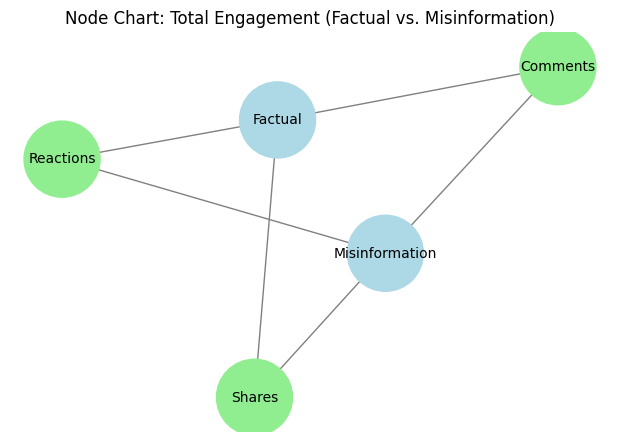

In [8]:
categories = ["Factual", "Misinformation"]
engagement_types = ["Shares", "Reactions", "Comments"]

edges = [
    ("Factual", "Shares"),
    ("Factual", "Reactions"),
    ("Factual", "Comments"),
    ("Misinformation", "Shares"),
    ("Misinformation", "Reactions"),
    ("Misinformation", "Comments"),
]

G = nx.Graph()
G.add_nodes_from(categories, color="lightblue")
G.add_nodes_from(engagement_types, color="lightgreen")
G.add_edges_from(edges)

node_colors = ["lightblue" if node in categories else "lightgreen" for node in G.nodes()]

plt.figure(figsize=(6, 4))
pos = nx.spring_layout(G, seed=42)  
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color="gray", node_size=3000, font_size=10)
plt.title("Node Chart: Total Engagement (Factual vs. Misinformation)")
plt.show()